# PROJET 4 : Segmentation des clients d'un site e-commerce


## SOMMAIRE  <a class="anchor" id="sommaire"></a>
## [IMPORT DES LIBRAIRIES](#3)<a class="anchor" id="sommaire"></a>
## [CHARGEMENT DES DONNEES](#4)<a class="anchor" id="sommaire"></a>
## [MISSION 1: DIFFERENTS TYPES DE SEGMENTATION ](#5)<a class="anchor" id="sommaire"></a>
### [M1-1 : RFM](#6)<a class="anchor" id="sommaire"></a>
### [M1-2 : K-MEANS](#7)<a class="anchor" id="sommaire"></a>
### [M1-3 : DB-SCAN](#8)<a class="anchor" id="sommaire"></a>


--------------------------------------------------------

## [IMPORT DES LIBRAIRIES](#sommaire)<a class="anchor" id="3"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from utils.functions import *
import os

## [CHARGEMENT DES DONNEES](#sommaire)<a class="anchor" id="4"></a>

In [2]:
### Lecture du fichier de sauvegarde de DF final
file_customers_Final_Behaviour = 'data/final/customers_Final_Behaviour.csv'
file_AllData = 'data/final/AllData.csv'

#customers_Final_Behaviour = pd.read_csv(file_customers_Final_Behaviour, sep='\t', engine='python', index_col='customer_id')
customers_Final_Behaviour = pd.read_csv(file_customers_Final_Behaviour, sep='\t', engine='python')
#all_Data = pd.read_csv(file_AllData, sep='\t', engine='python', index_col='order_id')
all_Data = pd.read_csv(file_AllData, sep='\t', engine='python')

In [3]:
all_Data_copy = all_Data.drop(columns=['Unnamed: 0'])
customers_Final_Behaviour_copy = customers_Final_Behaviour.drop(columns=['Unnamed: 0'])

In [4]:
#all_Data_copy.describe()

In [5]:
#customers_Final_Behaviour_copy.describe()

In [6]:
#customers_Final_Behaviour_copy.info()

In [7]:
#customers_Final_Behaviour_copy.sort_values(by='frequency_order', ascending='False')

## [MISSION 1: DIFFERENTS TYPES DE SEGMENTATION ](#sommaire)<a class="anchor" id="5"></a>

### [M1-1 : RFM ](#sommaire)<a class="anchor" id="6"></a>

In [8]:
#customers_Final_Behaviour_copy.frequency_order.unique()

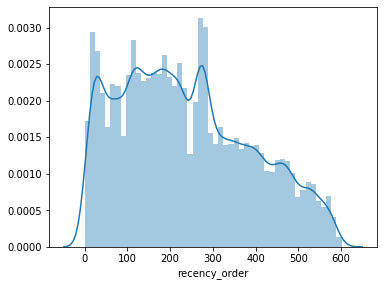

In [9]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.distplot(customers_Final_Behaviour_copy['recency_order'])
#plt.subplot(3, 3, 2)
#sns.distplot(customers_Final_Behaviour_copy['frequency_order'])
#plt.subplot(3, 3, 3)
#sns.distplot(customers_Final_Behaviour_copy['monetary_amount_order'])

In [26]:
#plt.figure(figsize=(20, 15))
#plt.subplot(3, 3, 2)
#sns.distplot(customers_Final_Behaviour_copy['frequency_order'])

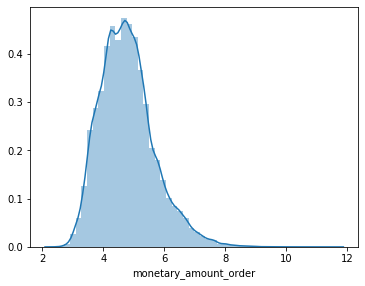

In [11]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 3)
sns.distplot(customers_Final_Behaviour_copy['monetary_amount_order'])

In [12]:
customers_Final_Behaviour_copy['r_percentile'] = customers_Final_Behaviour_copy['recency_order'].rank(method='first')
customers_Final_Behaviour_copy['r_score'] = pd.qcut(customers_Final_Behaviour_copy['r_percentile'], 4,labels=range(4,0,-1))

customers_Final_Behaviour_copy['f_percentile'] = customers_Final_Behaviour_copy['frequency_order'].rank(method='first')
customers_Final_Behaviour_copy['f_score'] = pd.qcut(customers_Final_Behaviour_copy['f_percentile'], 4, labels=range(4,0,-1))

customers_Final_Behaviour_copy['m_percentile'] = customers_Final_Behaviour_copy['monetary_amount_order'].rank(method='first')
customers_Final_Behaviour_copy['m_score'] = pd.qcut(customers_Final_Behaviour_copy['m_percentile'], 4, labels=range(4,0,-1))

customers_Final_Behaviour_copy['rfm_concat_score'] = customers_Final_Behaviour_copy['r_score'].astype(str) + customers_Final_Behaviour_copy['f_score'].astype(str) + customers_Final_Behaviour_copy['m_score'].astype(str)
customers_Final_Behaviour_copy['rfm_score'] = customers_Final_Behaviour_copy['r_score'].astype(int) + customers_Final_Behaviour_copy['f_score'].astype(int) + customers_Final_Behaviour_copy['m_score'].astype(int)

In [13]:
customers_Final_Behaviour_copy.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

           customer_city  recency_order  frequency_order  \
0                 franca            469                1   
1  sao bernardo do campo            228                1   
2              sao paulo            101                1   
3        mogi das cruzes            168                1   
4               campinas             31                1   

   monetary_amount_order  amount_sports_leisure  amount_health_beauty  \
0               4.996334                    NaN                   NaN   
1               5.818539                    NaN                   NaN   
2               5.067205                    NaN                   NaN   
3               5.160778                    NaN                   NaN   
4               5.534377                    NaN                   NaN   

   amount_home  amount_furniture  ...  STATE_SP  STATE_TO  r_percentile  \
0          NaN          4.996334  ...         1         0       85969.0   
1     5.818539               NaN  ...         1         0       49517.0   
2          NaN          5.067205  ...         1         0       20112.0   
3          NaN          5.160778  ...         1         0       35800.0   
4     5.534377               NaN  ...         1         0        7016.0   

   r_score  f_percentile  f_score  m_percentile  m_score  rfm_concat_score  \
0        1           1.0        4       60035.0        2               142   
1        2           2.0        4       83325.0        1               241   
2        4           3.0        4       62925.0        2               442   
3        3           4.0        4       66821.0        2               342   
4        4           5.0        4       78105.0        1               441   

   rfm_score  
0          7  
1          7  
2         10  
3          9  
4          9  

[5 rows x 52 columns]

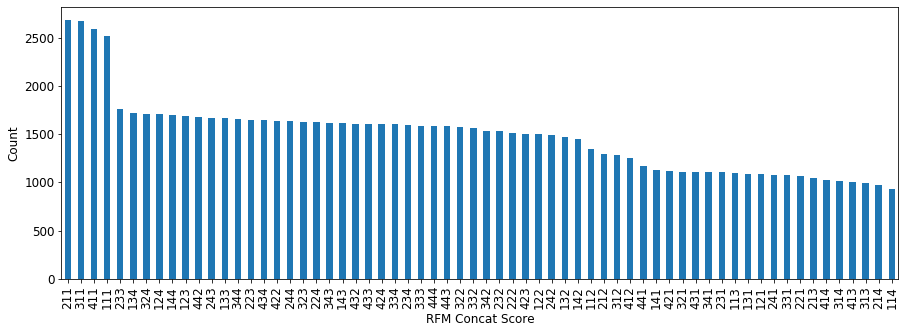

In [14]:
ax = customers_Final_Behaviour_copy['rfm_concat_score'].value_counts().plot(kind='bar', figsize=(15, 5), fontsize=12)
ax.set_xlabel("RFM Concat Score", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [15]:
r_quarters = customers_Final_Behaviour_copy['recency_order'].quantile(q=[0.0, 0.25,0.5,0.75, 1]).to_list()
f_quarters = customers_Final_Behaviour_copy['frequency_order'].quantile(q=[0.0, 0.25,0.5,0.75, 1]).to_list()
m_quarters = customers_Final_Behaviour_copy['monetary_amount_order'].quantile(q=[0.0, 0.25,0.5,0.75, 1]).to_list()
quartile_spread = pd.DataFrame(list(zip(r_quarters, f_quarters, m_quarters)), 
                      columns=['Q_Recency','Q_Frequency', 'Q_Monetary'],
                     index = ['min', 'first_part','second_part','third_part', 'max'])
quartile_spread

Q_Recency  Q_Frequency  Q_Monetary
min                0.0          1.0    2.359910
first_part       114.0          1.0    4.154342
second_part      219.0          1.0    4.703521
third_part       347.0          1.0    5.282747
max              601.0         21.0   11.601976

In [29]:
#plt.figure(figsize = (16,6))
#hist = plt.hist(customers_Final_Behaviour_copy['monetary_amount_order'], bins=100, align='left', color='cornflowerblue')
#for q in m_quarters:
#    plt.vlines(q, ymin=0, ymax = max(hist[0]))

In [28]:
#plt.figure(figsize = (16,6))
#hist = plt.hist(customers_Final_Behaviour_copy['recency_order'], bins=100, align='left', color='cornflowerblue')
#for q in r_quarters:
#    plt.vlines(q, ymin=0, ymax = max(hist[0]))

In [27]:
#plt.figure(figsize = (16,6))
#hist = plt.hist(customers_Final_Behaviour_copy['frequency_order'], bins=100, align='left', color='cornflowerblue')
#for q in f_quarters:
#    plt.vlines(q, ymin=0, ymax = max(hist[0]))

La majorité des consommateurs n'ont commandé qu'une fois donc le RFM n'est pas forcement la methode la plus adaptée

In [19]:
#customers_Final_Behaviour_copy

In [20]:
# Define rfm_level function
df = customers_Final_Behaviour_copy
def rfm_level(df):
    if df['rfm_score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['rfm_score'] >= 8) and (df['rfm_score'] < 9)):
        return 'Champions'
    elif ((df['rfm_score'] >= 7) and (df['rfm_score'] < 8)):
        return 'Loyal'
    elif ((df['rfm_score'] >= 6) and (df['rfm_score'] < 7)):
        return 'Potential'
    elif ((df['rfm_score'] >= 5) and (df['rfm_score'] < 6)):
        return 'Promising'
    elif ((df['rfm_score'] >= 4) and (df['rfm_score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
customers_Final_Behaviour_copy['rfm_level'] = customers_Final_Behaviour_copy.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
customers_Final_Behaviour_copy.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

           customer_city  recency_order  frequency_order  \
0                 franca            469                1   
1  sao bernardo do campo            228                1   
2              sao paulo            101                1   
3        mogi das cruzes            168                1   
4               campinas             31                1   

   monetary_amount_order  amount_sports_leisure  amount_health_beauty  \
0               4.996334                    NaN                   NaN   
1               5.818539                    NaN                   NaN   
2               5.067205                    NaN                   NaN   
3               5.160778                    NaN                   NaN   
4               5.534377                    NaN                   NaN   

   amount_home  amount_furniture  ...  STATE_TO  r_percentile  r_score  \
0          NaN          4.996334  ...         0       85969.0        1   
1     5.818539               NaN  ...         0       49517.0        2   
2          NaN          5.067205  ...         0       20112.0        4   
3          NaN          5.160778  ...         0       35800.0        3   
4     5.534377               NaN  ...         0        7016.0        4   

   f_percentile  f_score  m_percentile  m_score  rfm_concat_score  rfm_score  \
0           1.0        4       60035.0        2               142          7   
1           2.0        4       83325.0        1               241          7   
2           3.0        4       62925.0        2               442         10   
3           4.0        4       66821.0        2               342          9   
4           5.0        4       78105.0        1               441          9   

          rfm_level  
0             Loyal  
1             Loyal  
2  Can't Loose Them  
3  Can't Loose Them  
4  Can't Loose Them  

[5 rows x 53 columns]

In [22]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = customers_Final_Behaviour_copy.groupby('rfm_level').agg({
    'recency_order': 'mean',
    'frequency_order': 'mean',
    'monetary_amount_order': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                   recency_order frequency_order monetary_amount_order       
                            mean            mean                  mean  count
rfm_level                                                                    
Can't Loose Them           146.7             1.0                   4.2  31315
Champions                  228.0             1.0                   4.6  17263
Loyal                      270.7             1.0                   4.8  16066
Needs Attention            360.7             1.7                   5.8   5115
Potential                  281.5             1.2                   5.2  13863
Promising                  314.5             1.4                   5.5   8719
Require Activation         448.1             2.1                   6.2   2521


In [ ]:
import matplotlib.pyplot as plt
import squarify

rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

### [M1-2 : K-Means ](#sommaire)<a class="anchor" id="7"></a>

### [M1-3 : DB-Scan ](#sommaire)<a class="anchor" id="8"></a>